In [47]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.linalg as la
import pickle

LA01

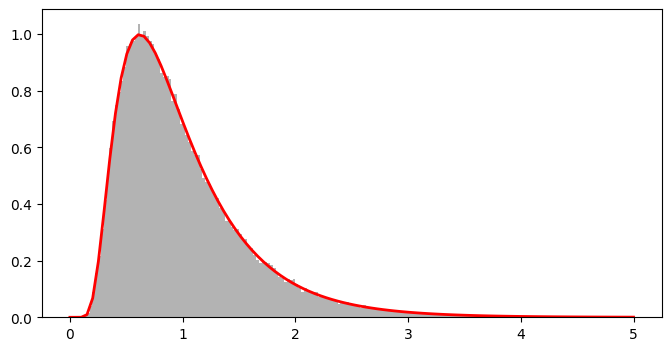

<Figure size 640x480 with 0 Axes>

In [13]:
x=rd.wald(1,3,int(100000)) #1e5 pts aleat�rios (mu=1,lambda=3)
#fazer histograma + plot da distribui��o
hx,b=np.histogram(x,np.linspace(0,5,201),density=True)
#b->array de 201 entradas (fronteiras de quantifica��o)
#obter valores de quantifica��o (valor a meio dos intervalos)
b=(b[:-1]+b[1:])/2.0 # converter array de 201 para 200
t=np.linspace(0+1e-6,5,100)
fx=np.sqrt(3/(2*np.pi*t**3))*np.exp(-3*(t-1)**2/(2*t))
plt.figure(figsize=(8,4))
plt.bar(b,hx,width=0.025,color=[0.7,.7,.7])
plt.plot(t,fx,'r',linewidth=2)
#plt.axis([0,5,0,1.1])
plt.show()
plt.savefig('figs/L1AAex001.png',bbox_inches='tight',transparent=True) 

In [14]:
a = rd.randint(-10,10,10)
print(a)
print(a[:-1])
print(a[1:])

[ 1 -5 -5 -6  2 -2  7  0  6 -1]
[ 1 -5 -5 -6  2 -2  7  0  6]
[-5 -5 -6  2 -2  7  0  6 -1]


In [15]:
hx,b=np.histogram(x,np.linspace(0,5,201),density=True)
print(hx.shape)
print(b.shape)

(200,)
(201,)


LA02

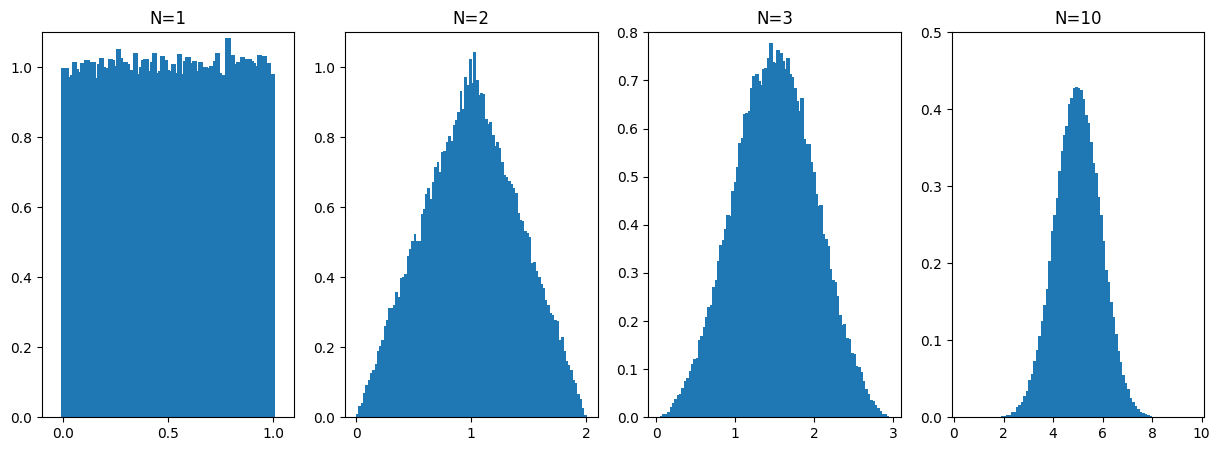

In [16]:
plt.close('all')
N=100000 #1e5 pts uniforme
x1=rd.rand(N) # gerar uma vez 100 mil pontos
x2=np.sum(rd.rand(2,N),axis=0) #soma de 2 v.a. uniformes gerar 2 vezes 100 mil pontos
x3=np.sum(rd.rand(3,N),axis=0) #soma de 3 v.a. uniformes gerar 3 vezes 100 mil pontos
x4=np.sum(rd.rand(10,N),axis=0) #soma de 10 v.a. uniformes gerar 10 vezes 100 mil pontos
hx,b=np.histogram(x1,np.linspace(0,1,101),density=True)
b=(b[:-1]+b[1:])/2
plt.figure(figsize=(15,5))
plt.subplot(141);plt.axis([-0.1,1.1,0,1.1]);plt.title('N=1')
plt.bar(b[0:100],hx,width=0.025);plt.xticks([0,0.5,1])
hx,b=np.histogram(x2,np.linspace(0,2,101),density=True)
b=(b[:-1]+b[1:])/2
plt.subplot(142);plt.axis([-0.1,2.1,0,1.1]);plt.title('N=2')
plt.bar(b[0:100],hx,width=0.025);plt.xticks(np.arange(3))
hx,b=np.histogram(x3,np.linspace(0,3,101),density=True)
b=(b[:-1]+b[1:])/2
plt.subplot(143);plt.axis([-0.1,3.1,0,.8]);plt.title('N=3')
plt.bar(b[0:100],hx,width=0.05);plt.xticks(np.arange(4))
hx,b=np.histogram(x4,np.linspace(0,10,101),density=True)
b=(b[:-1]+b[1:])/2
plt.subplot(144);plt.axis([-0.1,10.1,0,.5]);plt.title('N=10')
plt.bar(b[0:100],hx,width=0.1);plt.xticks(np.arange(0,11,2))
plt.savefig('figs/L1AAex002.png',bbox_inches='tight',transparent=True) 
plt.show()


In [17]:
x = rd.rand(2,5)
print(x)


[[0.94679725 0.26018965 0.88678082 0.93596857 0.31611721]
 [0.29762131 0.42398682 0.3033361  0.65847111 0.03035331]]


LA03

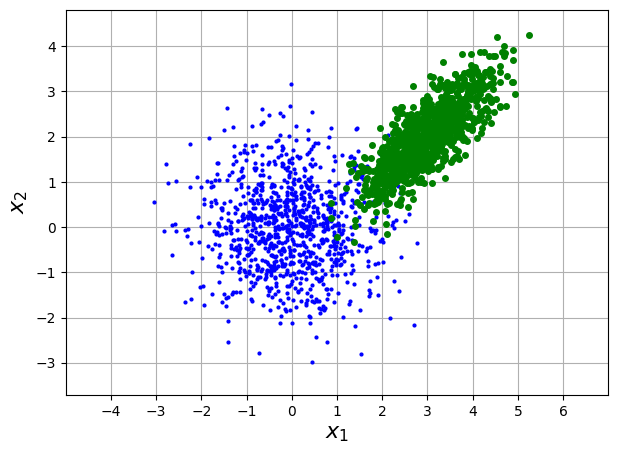

In [18]:
#criar matrix A 2x2 e vector b 2x1
A=np.array([[1./3/np.sqrt(2.),1./np.sqrt(2.)],[-1./np.sqrt(2.)/3,1./np.sqrt(2.)]])
b=np.array([3,2])
#criar 1000 pontos
np.random.seed(0);
X=np.random.randn(2,1000)
#para somar b, tem que se transpor x (e voltar a transpor)
Y=(np.dot(A,X).T+b).T
#ou em alternativa: Y=np.dot(A,X)+b[:,np.newaxis]
plt.figure(figsize=(7,5)) #criar figura
plt.plot(X[0,:],X[1,:],'.b',markersize=4)
plt.plot(Y[0,:],Y[1,:],'og',markersize=4)
plt.axis('equal');plt.axis([-5.,7,-4.,5.1])
plt.grid();plt.xticks(np.arange(-4,7))
plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$x_2$',fontsize=16)
plt.savefig('figs/L1AAex003.png',bbox_inches='tight',transparent=True) #guardar em ficheiro ".png"
plt.show()


In [19]:
X = np.random.randn(2,1000)
c = np.array([[3],[2]])
Y = np.dot(A,X)+c
print(Y.shape)
print(X.shape)
print(c.shape)

(2, 1000)
(2, 1000)
(2, 1)


In [31]:
X = np.random.randn(2,1000)
Y = np.dot(A,X)+b[:,np.newaxis]
my = np.mean(Y,axis=1)
Yn = Y-my[:,np.newaxis]
c1 = np.cov(Y)
c2 = np.dot(Yn,Yn.T)/(X.shape[1]-1)
print(c1)
print(c2)
print(np.dot(A,A.T))

[[0.55973372 0.4560954 ]
 [0.4560954  0.57366271]]
[[0.55973372 0.4560954 ]
 [0.4560954  0.57366271]]
[[0.55555556 0.44444444]
 [0.44444444 0.55555556]]


LA04

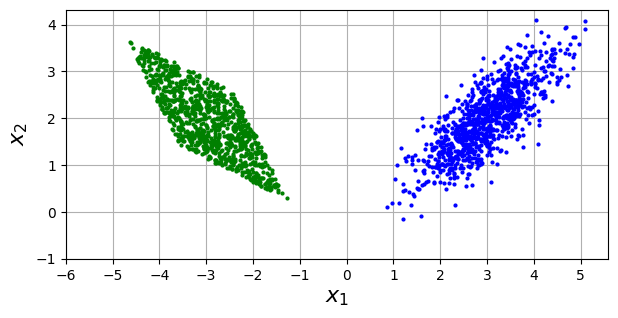

In [38]:
#cov + média
S1=np.array([[5./9,4./9.],[4./9,5./9]])
m1=np.array([3,2])
S2=np.array([[5./9,-4./9.],[-4./9,5./9]])
m2=np.array([-3,2])
#criar 1000 pontos
N=1000
np.random.seed(0)
X1=np.random.randn(2,N)
X2=(np.random.rand(2,N)-0.5)*np.sqrt(12.)#tirar média e por var=1
A1=la.sqrtm(S1);A2=la.sqrtm(S2)
#transforma��es
Y1=(np.dot(A1,X1).T+m1).T
Y2=(np.dot(A2,X2).T+m2).T
plt.figure(figsize=(7,4)) #criar figura
plt.plot(Y1[0,:],Y1[1,:],'.b',Y2[0,:],Y2[1,:],'.g',markersize=4)
plt.axis('scaled')
plt.grid()
plt.xticks(np.arange(-6,6,1))
plt.yticks(np.arange(-1,5,1))
plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$x_2$',fontsize=16)
plt.savefig('figs/L1AAex004.png',bbox_inches='tight',transparent=True) #guardar em ficheiro ".png"
plt.show()


In [39]:
N=1000
np.random.seed(0)
X1 = np.random.randn(2,N)
X2 = (np.random.rand(2,N)-0.5)*np.sqrt(12.0)
print(np.cov(X1))
print(np.cov(X2))

[[ 0.97520967 -0.03013964]
 [-0.03013964  0.93827203]]
[[0.99574625 0.05823248]
 [0.05823248 0.94833674]]


LA04a


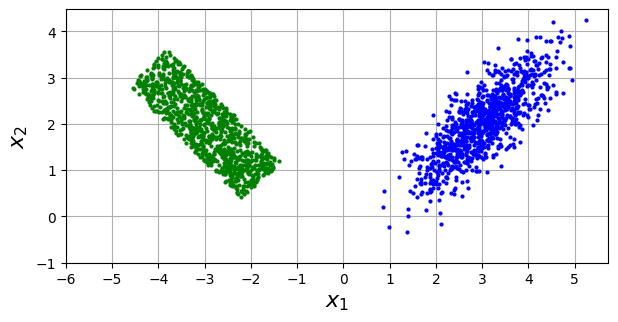

In [45]:
#cov + m�dia
plt.close('all')
A1=np.array([[1./3/np.sqrt(2.),1./np.sqrt(2.)],[-1./np.sqrt(2.)/3,1./np.sqrt(2.)]])
A2=np.array([[1./3/np.sqrt(2.),-1./np.sqrt(2.)],[1./np.sqrt(2.)/3,1./np.sqrt(2.)]])
b1=np.array([3,2]);b2=np.array([-3,2])
#criar 1000 pontos
N=1000
np.random.seed(0)
X1=np.random.randn(2,N)
X2=(np.random.rand(2,N)-0.5)*np.sqrt(12.)#tirar m�dia e por var=1
Y1=(np.dot(A1,X1).T+b1).T;Y2=(np.dot(A2,X2).T+b2).T
plt.figure(figsize=(7,4)) #criar figura
plt.plot(Y1[0,:],Y1[1,:],'.b',Y2[0,:],Y2[1,:],'.g',markersize=4)
plt.axis('scaled');plt.grid()
plt.xticks(np.arange(-6,6,1));plt.yticks(np.arange(-1,5,1))
plt.xlabel('$x_1$',fontsize=16);plt.ylabel('$x_2$',fontsize=16)
plt.savefig('figs/L1AAex004b.png',bbox_inches='tight',transparent=True) #guardar em ficheiro ".png"
plt.show()


In [46]:
print(np.cov(X1))
print(np.cov(X2))

[[ 0.97520967 -0.03013964]
 [-0.03013964  0.93827203]]
[[0.99574625 0.05823248]
 [0.05823248 0.94833674]]


LA06

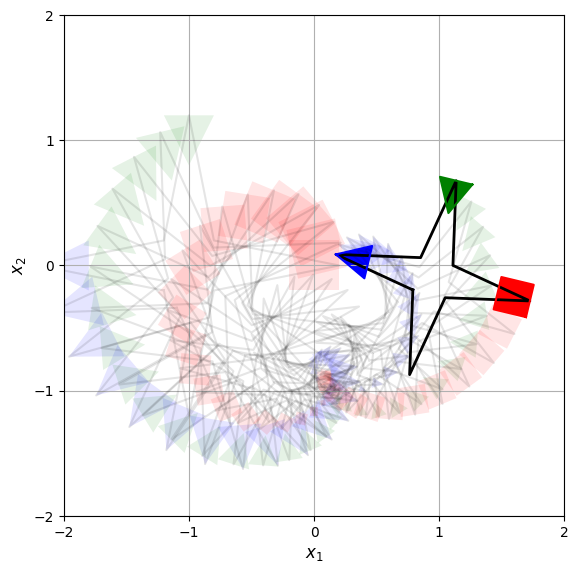

In [49]:
Parm=pickle.load(open('L1AAestrela.p','rb'))#importar pontos
pts0=Parm[0];pts1=Parm[1];pts2=Parm[2];pts3=Parm[3]
N=40 #n� de transforma��es
ang=np.arange(-np.pi,2.*np.pi,3.*np.pi/N)
transl=np.zeros((2,N))
transl[0,:]=np.arange(-1,1,2./N);transl[1,:]=transl[0,:]**2-1
scl=(1.+np.cos(transl[0,:]*np.pi/2+np.pi/2))-.8#escalamento
plt.figure(figsize=(7,6.5))    #criar figura
idx=0;media=np.zeros((2,1))    #vector temporario
for a in ang:
    T=np.array([[np.cos(a),-np.sin(a)],[np.sin(a),np.cos(a)]])
    media[0,0]=transl[0,idx];media[1,0]=transl[1,idx]
    s=scl[idx]
    idx=idx+1
    x0=np.dot(T,s*pts0)+media;x1=np.dot(T,s*pts1)+media
    x2=np.dot(T,s*pts2)+media;x3=np.dot(T,s*pts3)+media
    plt.plot(x0[0,:],x0[1,:],'-k',alpha=.1)
    plt.fill(x1[0,:],x1[1,:],'b',x2[0,:],x2[1,:],'g',\
    x3[0,:],x3[1,:],'r',alpha=.1)
plt.plot(x0[0,:],x0[1,:],'-k',linewidth=2)
plt.plot(x1[0,:],x1[1,:],'b',x2[0,:],x2[1,:],'g',x3[0,:],x3[1,:],'r')
plt.fill(x1[0,:],x1[1,:],'b',x2[0,:],x2[1,:],'g',x3[0,:],x3[1,:],'r')
plt.axis('scaled'),plt.grid(True),
plt.axis(np.array([-1.,1.,-1.,1.])*2)
plt.xlabel('$x_1$',fontsize=12),plt.xticks(np.arange(-2,2.1))
plt.ylabel('$x_2$',fontsize=12),plt.yticks(np.arange(-2,2.1))
plt.savefig('figs/L1AAex006.png',bbox_inches='tight',transparent=True) 
plt.show()